In [1]:
import akshare as ak
import numpy as np

In [2]:
sh = ak.stock_zh_index_daily("sh000016")
cyb = ak.stock_zh_index_daily("sz399006")

In [5]:
sh.index = sh['date']
sh = sh[['close']].copy()
sh.columns = ['sh']

In [7]:
cyb.index = cyb['date']
cyb = cyb[['close']].copy()
cyb.columns = ['cyb']

In [9]:
data = sh.merge(cyb, left_index=True, right_index=True)

<AxesSubplot:xlabel='date'>

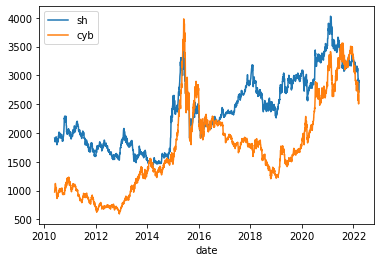

In [10]:
data.plot(y=['sh', 'cyb'])

In [14]:
df = data.copy()

In [19]:
# log return
df['cyb'] = np.log(df['cyb']) - np.log(df['cyb'].shift(1))
df['sh'] = np.log(df['sh']) - np.log(df['sh'].shift(1))

<AxesSubplot:xlabel='date'>

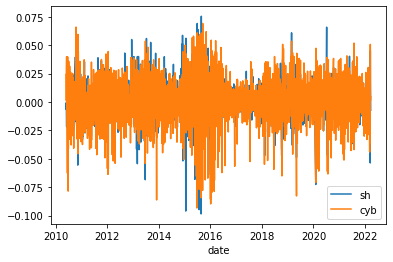

In [21]:
df.plot(y=['sh', 'cyb'])

In [24]:
print(np.std(df['sh']) * 240, np.std(df['cyb']) * 240)

3.487275239525676 4.715261802737198


In [25]:
print(np.mean(df['sh']) * 240, np.mean(df['cyb']) * 240)

0.0346675356425945 0.08622530492934638


In [27]:
target = 0.05
w = [0.5, 0.5]

In [28]:
from scipy.optimize import minimize

In [46]:
def loss(w):
    new_log_ret = w[0] * df['sh'] + w[1] * df['cyb']
    std = np.std(new_log_ret) * 240
    r = np.mean(new_log_ret) * 240
    return 100 * (r - target) ** 2 + std

In [47]:
cons = {'type': 'eq', 'fun': lambda w: w[0] + w[1] - 1}
bnds = [(0, 1), (0, 1)]

In [48]:
ret = minimize(loss, w, method='SLSQP', bounds=bnds, constraints=cons)

In [49]:
ret

     fun: 3.388194330449416
     jac: array([3.34600449, 3.34601223])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.78822166, 0.21177834])

In [50]:
w = ret.x

In [51]:
new_log_ret = w[0] * df['sh'] + w[1] * df['cyb']
std = np.std(new_log_ret) * 240
r = np.mean(new_log_ret) * 240

In [52]:
print(std, r)

3.3862463035374666 0.045586354214541575
